# t-SNE & UMAP

### Loading Libraries

In [3]:
# Warnings
import warnings

# Numerical Computing
import numpy as np
from numpy.random import choice

# Data Manipulation
import pandas as pd

# Scikit-Learn
from sklearn.datasets import fetch_openml, make_swiss_roll, make_blobs
from sklearn.manifold import TSNE
import umap

# Data Visualization
import seaborn as sns
import colorlover as cl
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from plotly.offline import init_notebook_mode, iplot

# IPyVolume
import ipyvolume as ipv

# Path
from pathlib import Path
from os.path import join

In [4]:
%matplotlib inline

In [5]:
sns.set_style('white')

warnings.filterwarnings('ignore')

In [6]:
init_notebook_mode(connected=True)

ipv_cmap = sns.color_palette('Paired', n_colors=10)

### T-Stochastic Neighbor Embedding (TSNE): Parameter Settings

#### Perplexity: `Emphasis on Local vs Global Structure`

In [7]:
data, label = make_blobs(n_samples=200,
                         n_features=2,
                         centers=2,
                         random_state=42)

In [9]:
colors = ['royal blue', 'orangered']

cmap = ListedColormap(sns.xkcd_palette(colors))

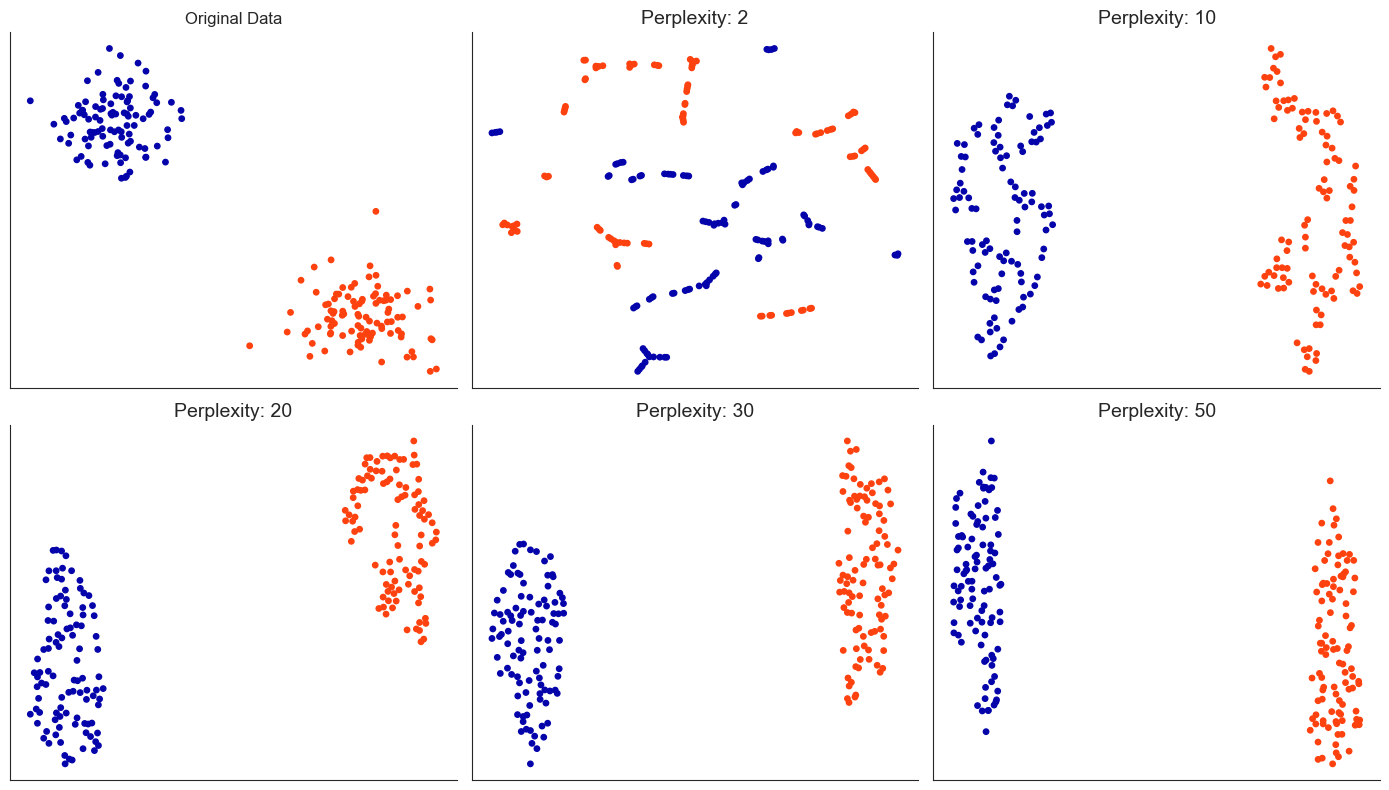

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

axes = axes.flatten()

axes[0].scatter(data[:, 0], data[:, 1], s=15, c=label, cmap=cmap)
axes[0].set_title('Original Data')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, p in enumerate([2, 10, 20, 30, 50], 1):
    embedding = TSNE(perplexity=p, n_iter=5000).fit_transform(data)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=15, c=label, cmap=cmap)
    axes[i].set_title(f'Perplexity: {p:.0f}', fontsize=14)
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)
sns.despine()
fig.tight_layout()
plt.show()

### Convergence with `n_iter`

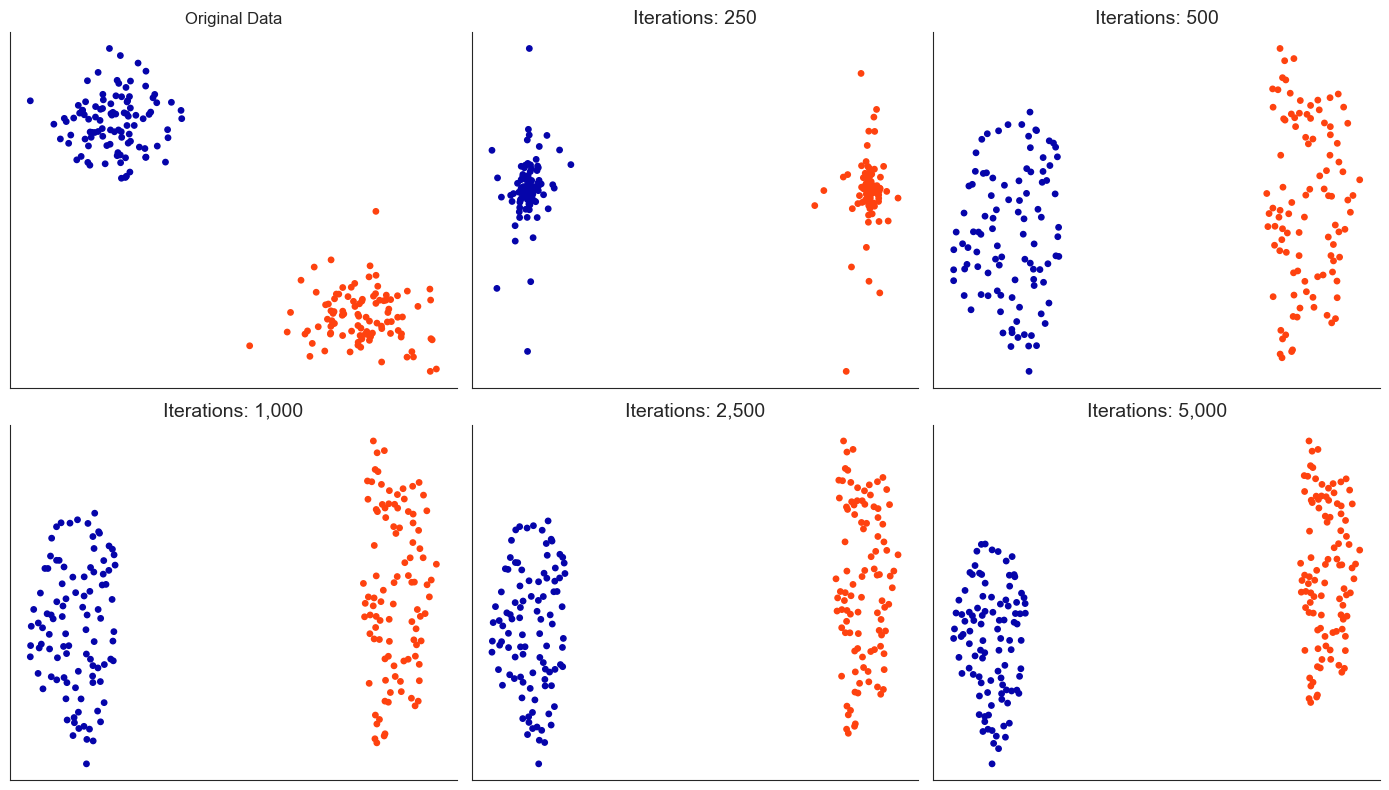

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

axes[0].scatter(data[:, 0], data[:, 1], s=15, c=label, cmap=cmap)
axes[0].set_title('Original Data')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, n in enumerate([250, 500, 1000, 2500, 5000], 1):
    embedding = TSNE(perplexity=30, n_iter=n).fit_transform(data)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=15, c=label, cmap=cmap)
    axes[i].set_title(f'Iterations: {n:,.0f}', fontsize=14)
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False) 
    
sns.despine()
fig.tight_layout();
plt.show()

### Different Cluster Sizes

In [12]:
data, label = make_blobs(n_samples=200, 
                         n_features=2,
                         cluster_std=[10, 1], 
                         centers=2, 
                         random_state=42)

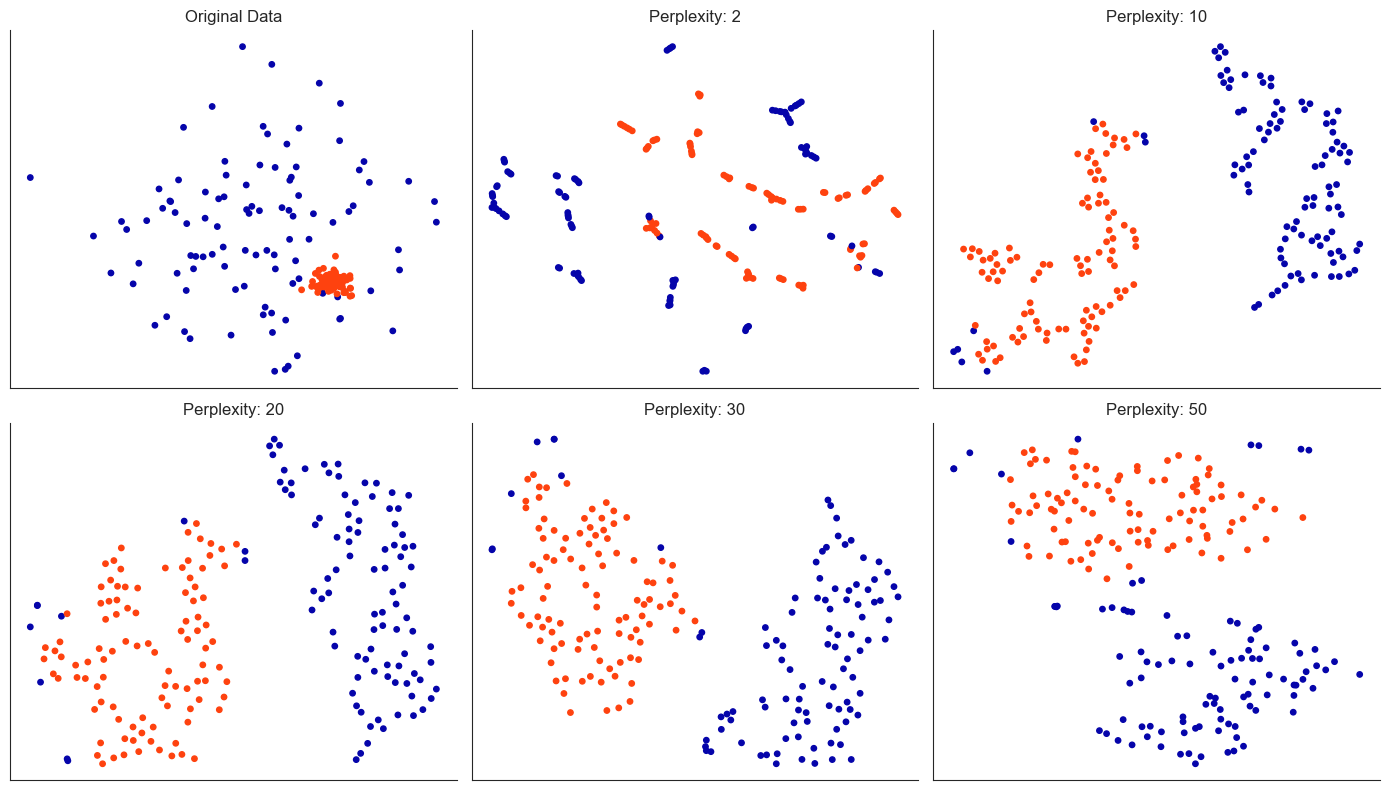

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

axes[0].scatter(data[:, 0], data[:, 1], s=15, c=label, cmap=cmap)
axes[0].set_title('Original Data')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, p in enumerate([2,10, 20, 30, 50], 1):
    embedding = TSNE(perplexity=p, n_iter=5000).fit_transform(data)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=15, c=label, cmap=cmap)
    axes[i].set_title(f'Perplexity: {p:.0f}')
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

sns.despine()
fig.tight_layout();
plt.show()

### Different Cluster Distances

In [14]:
data, label = make_blobs(n_samples=150,
                         n_features=2,
                         centers=[[-10, 0], [-8, 0], [10, 0]],
                         random_state=42)

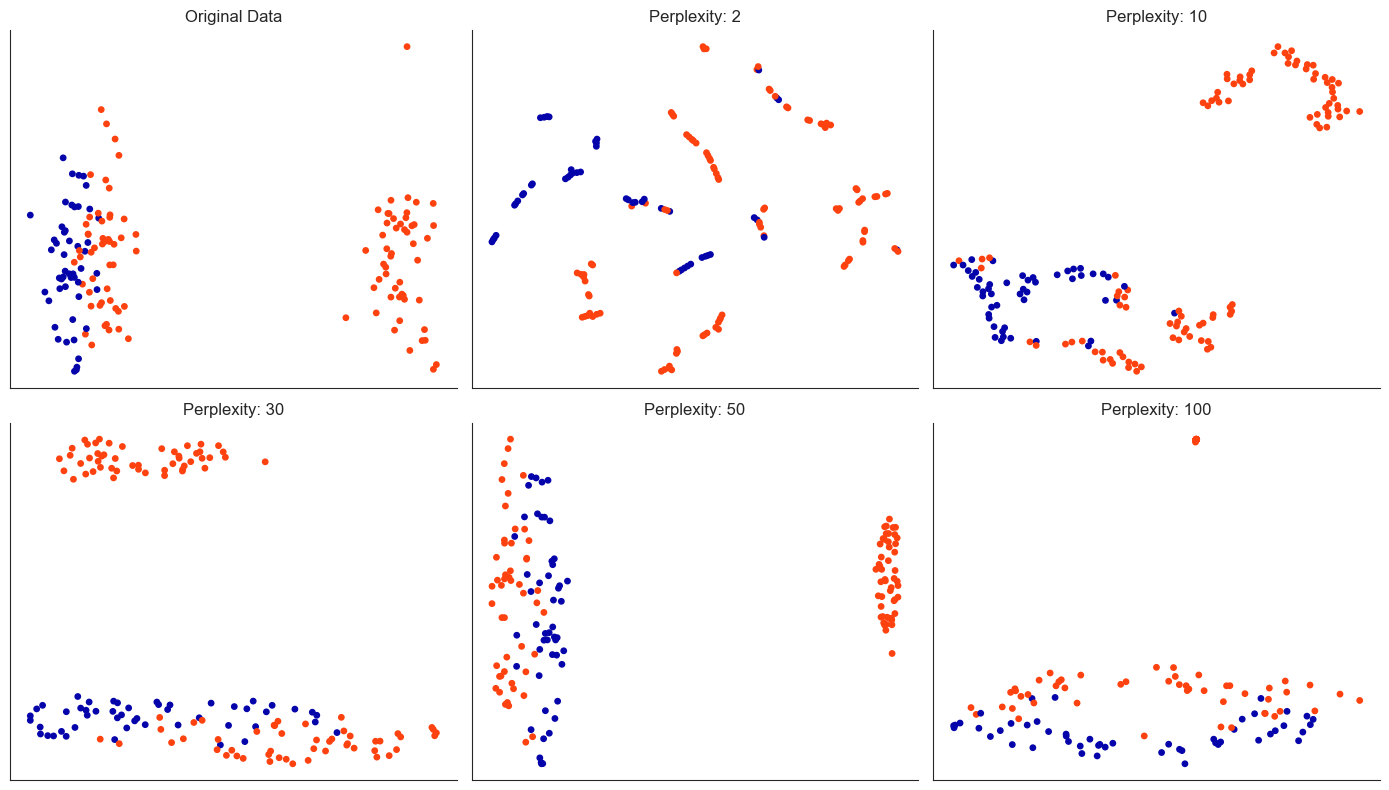

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

axes[0].scatter(data[:, 0], data[:, 1], s=15, c=label, cmap=cmap)
axes[0].set_title('Original Data')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, p in enumerate([2,10, 30, 50, 100], 1):
    embedding = TSNE(perplexity=p, n_iter=5000).fit_transform(data)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=15, c=label, cmap=cmap)
    axes[i].set_title('Perplexity: {:.0f}'.format(p))
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

sns.despine()
fig.tight_layout();
plt.show()

### More Points Require Higher Perplexity

In [16]:
data, label = make_blobs(n_samples=600,
                         n_features=2,
                         centers=[[-10, 0], [-8, 0], [10, 0]],
                         random_state=42)

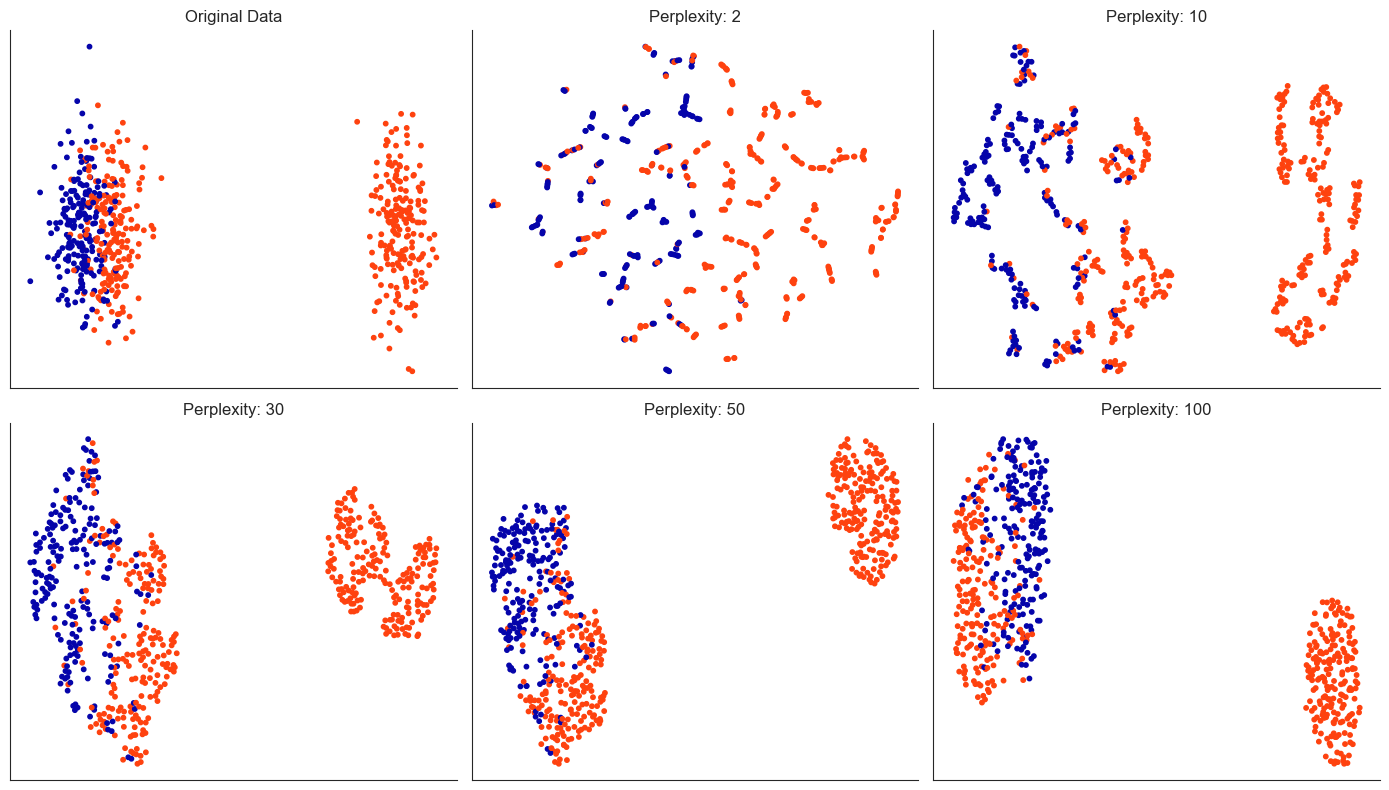

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

axes[0].scatter(data[:, 0], data[:, 1], s=10, c=label, cmap=cmap)
axes[0].set_title('Original Data')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)


for i, p in enumerate([2,10, 30, 50, 100], 1): 
    embedding = TSNE(perplexity=p, n_iter=5000).fit_transform(data)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10, c=label, cmap=cmap)
    axes[i].set_title('Perplexity: {:.0f}'.format(p))
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

sns.despine()
fig.tight_layout();
plt.show()

### Uniform Manifold Approximation and Projection (UMAP): Parameter Settings

#### Neighbors

In [18]:
data, label = make_blobs(n_samples=600,
                         n_features=2,
                         centers=2,
                         random_state=42)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


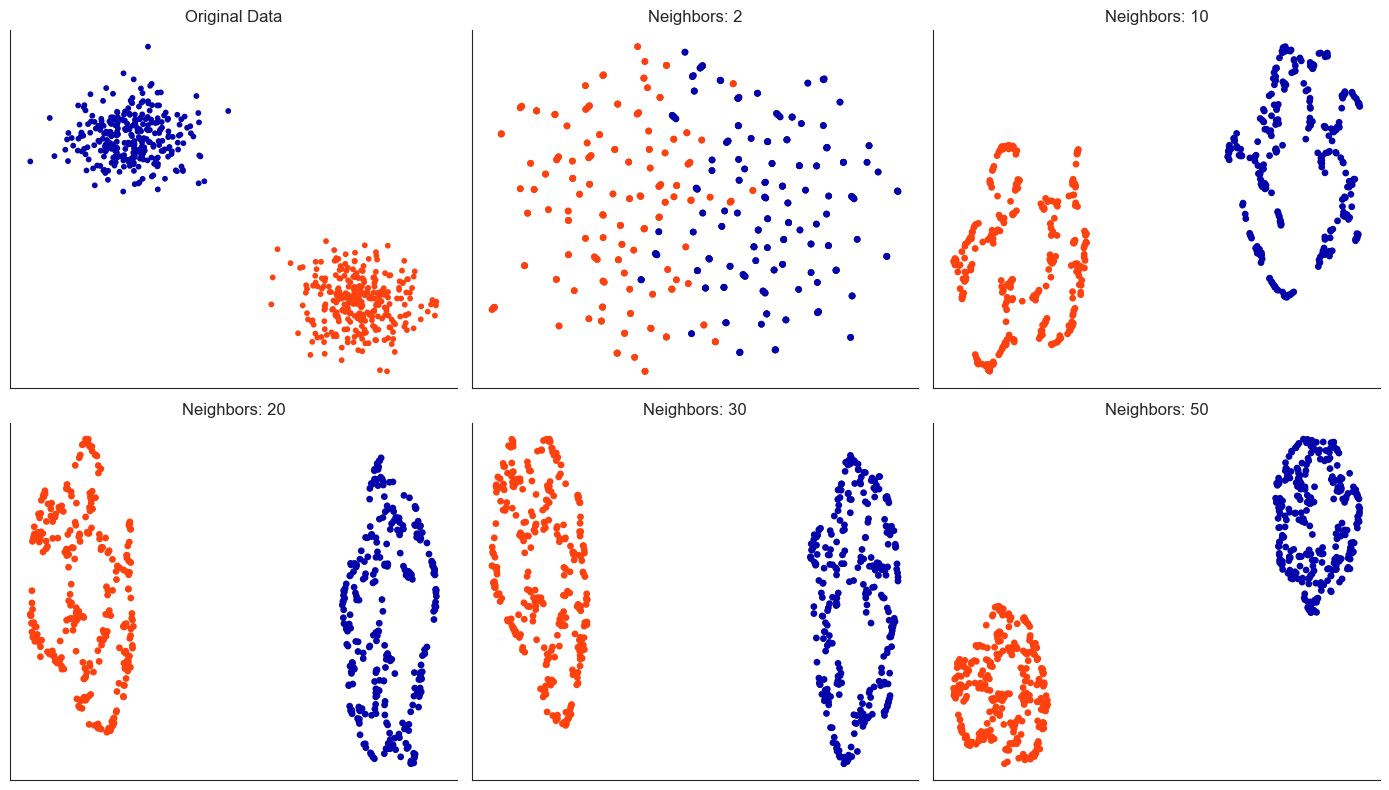

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

axes = axes.flatten()
axes[0].scatter(data[:, 0], data[:, 1], s=10, c=label, cmap=cmap)
axes[0].set_title('Original Data')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, n in enumerate([2,10, 20, 30, 50], 1):
    embedding = umap.UMAP(n_neighbors=n, min_dist=0.1).fit_transform(data)    
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=15, c=label, cmap=cmap)
    axes[i].set_title(f'Neighbors: {n:.0f}')
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

sns.despine()
fig.tight_layout();
plt.show()

### Minimum Distance

In [20]:
data, label = make_blobs(n_samples=200,
                         n_features=2,
                         centers=2,
                         random_state=42)

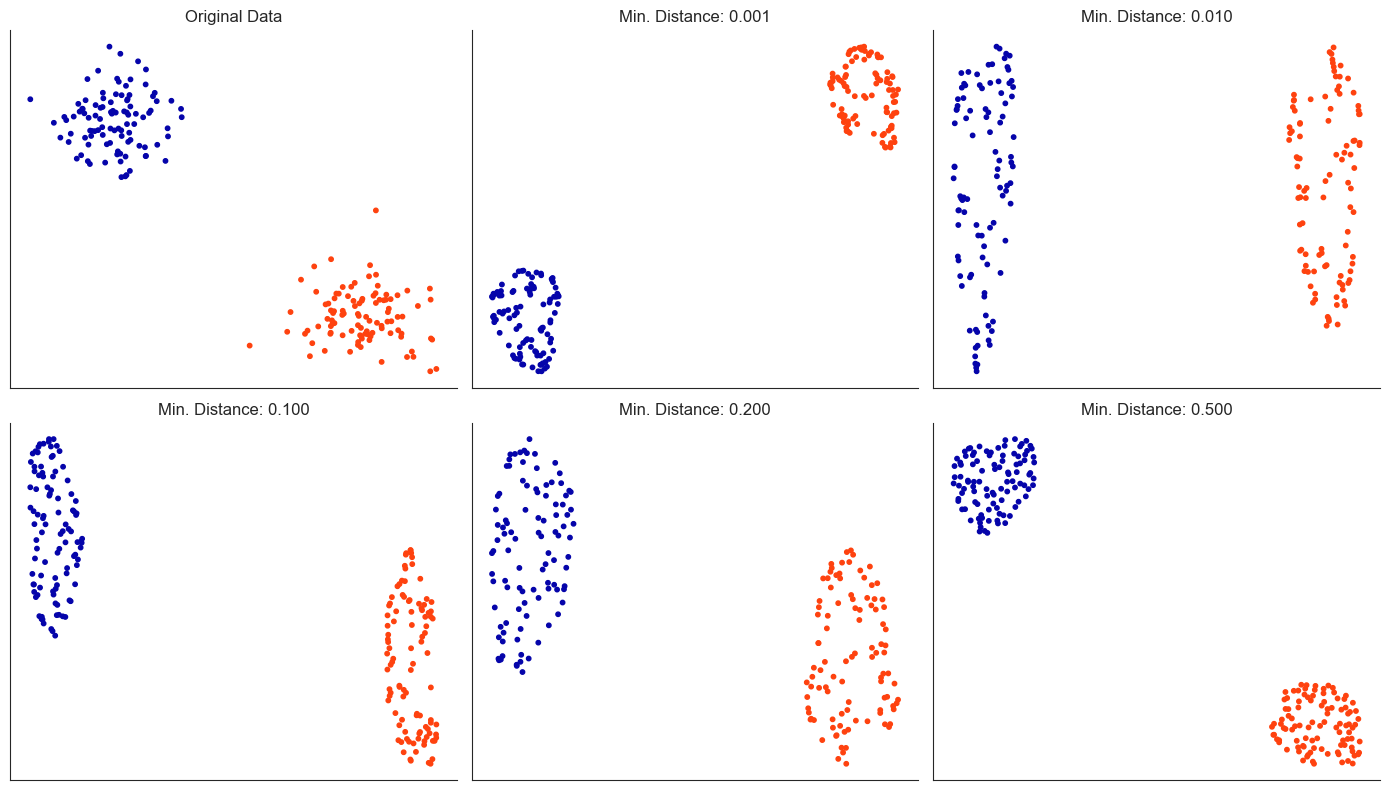

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

axes[0].scatter(data[:, 0], data[:, 1], s=10, c=label, cmap=cmap)
axes[0].set_title('Original Data')
axes[0].axes.get_xaxis().set_visible(False)
axes[0].axes.get_yaxis().set_visible(False)

for i, d in enumerate([.001, .01, .1, .2, .5], 1):
    embedding = umap.UMAP(n_neighbors=30, min_dist=d).fit_transform(data)
    axes[i].scatter(embedding[:, 0], embedding[:, 1], s=10, c=label, cmap=cmap)
    axes[i].set_title('Min. Distance: {:.3f}'.format(d))
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)

sns.despine()
fig.tight_layout();
plt.show()

### Non-Linear Manifolds: Swiss Roll

In [22]:
n_samples = 10000

palette = sns.color_palette('viridis',
                            n_colors=n_samples)

In [23]:
zeros = np.zeros(n_samples) + .5
swiss_3d, swiss_val = make_swiss_roll(n_samples=n_samples,
                                      noise=.1,
                                      random_state=42)

swiss_3d = swiss_3d[swiss_val.argsort()[::-1]]
x, y, z = swiss_3d.T

### TSNE

In [24]:
data_path = Path('data')

swiss_path = data_path / 'swiss_roll'

In [25]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 28))

method = 'tsne'
path = swiss_path / method
labels = np.load(swiss_path / 'labels.npy')

for row, perplexity in enumerate([2, 5, 10, 20, 30, 50, 100]):
    for col, n_iter in enumerate([250, 500, 1000, 3000, 5000]):
        x, y = np.load(swiss_path / method / f'{perplexity}_{n_iter}.npy').T
        axes[row, col].scatter(x, y, c=palette, s=5)
        axes[row, col].set_title(f'Perplexity: {perplexity} | Iterations: {n_iter}',
                                 fontsize=15)
        axes[row, col].axis('off')

fig.suptitle('T-Stochastic Neighbor Embedding (TSNE)', fontsize=18)
fig.tight_layout()
fig.subplots_adjust(top=.95)
plt.show()

### UMAP

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 20))
method = 'umap'

path = swiss_path / method
labels = np.load(swiss_path / 'labels.npy')

for row, n_neighbors in enumerate([2, 5, 10, 25, 50]):
    for col, min_distance in enumerate([1, 10, 20, 50]):
        x, y = np.load(swiss_path / method / f'{n_neighbors}_{min_distance}.npy').T
        axes[row, col].scatter(x, y, c=palette, s=5)
        axes[row, col].set_title(f'Neighbors: {n_neighbors} | Min. Distance {min_distance/100:.2f}',
                                fontsize=15)
        axes[row, col].axis('off')

fig.tight_layout()
fig.suptitle('Uniform Manifold Approximation and Projection (UMAP)', fontsize=18)
fig.subplots_adjust(top=.95)
plt.show()

### Handwritten Digits

In [27]:
DATA_PATH = Path('..', '..', 'data')

mnist_src_path = DATA_PATH / 'mnist'

In [29]:
mnist_data = np.load(mnist_src_path / 'data.npy')

mnist_label = np.load(mnist_src_path / 'labels.npy')

In [30]:
digits = np.arange(10)

n_digits = len(digits)

In [31]:
ipv_cmap = sns.color_palette('Paired', 
                             n_colors=n_digits)

print('   ', '  |  '.join([str(d) for d in digits]))
sns.palplot(ipv_cmap)

### Plotting Sample Images

In [33]:
h = w = int(np.sqrt(mnist_data.shape[1])) 

n_samples = 15

In [34]:
fig, ax = plt.subplots(figsize=(18, 8))
mnist_sample = np.empty(shape=(h * len(digits),
                                 w * n_samples))

for row, label in enumerate(digits):
    label_idx = np.argwhere(mnist_label == label).squeeze()
    sample_indices = choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = mnist_data[sample_idx].reshape(h, w)
        mnist_sample[i:i+h, j:j + w] = sample


ax.imshow(mnist_sample, cmap='Blues')
ax.set_title('MNIST Images', fontsize=16)
plt.axis('off')
fig.tight_layout()
plt.show()

In [35]:
plotly_cmap = cl.to_rgb( cl.scales['10']['qual']['Paired'])

def plotly_scatter(data, label, title, color, x='x', y='y'):
    fig = dict(
        data=[
            dict(
                type='scattergl',
                x=data[:, 0],
                y=data[:, 1],
                legendgroup="group",
                text=label.astype(int),
                mode='markers',
                marker=Marker(
                    size=5,
                    color=color,
                    autocolorscale=False,
                    showscale=False,
                    opacity=.9,
                    colorbar=ColorBar(
                        title='Class'
                    ),
                    line=dict(width=1))),
        ],
        layout=dict(title=title,
                    width=1200,
                    font=dict(color='white'),
                    xaxis=dict(
                        title=x, 
                        hoverformat='.1f', 
                        showgrid=False),
                    yaxis=dict(title=y, 
                               hoverformat='.1f', 
                               showgrid=False),
                    paper_bgcolor='rgba(0,0,0,0)',
                    plot_bgcolor='rgba(0,0,0,0)'
                    ))

    iplot(fig, show_link=False)

### t-SNE & UMAP Visualization

In [ ]:
mnist_emb_path = Path('data', 'mnist')

In [ ]:
methods = ['tsne', 'umap']

params = {'tsne': [5, 10, 20, 35],
          'umap': [5, 15, 25, 35]}

param_labels = {'tsne': 'Perplexity',
                'umap': 'Neighbors'}

In [ ]:
labels = np.load(mnist_emb_path / 'labels.npy')

color = [sns.color_palette('Paired', 10)[int(i)] for i in labels]

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 12))
    
for row, method in enumerate(methods):
    for col, param in enumerate(params[method]):
        x, y = np.load(mnist_emb_path / method / f'{param}.npy').T
        axes[row, col].scatter(x, y, c=color, s=5)
        title = f'{method.upper()} | {param_labels[method]}: {param}'
        axes[row, col].set_title(title, fontsize=20)
        axes[row, col].axis('off')

fig.tight_layout();
plt.show()

### Loading Fashion MNIST Data

In [36]:
fashion_src_path = DATA_PATH / 'fashion_mnist'

In [37]:
fashion_data = np.load(fashion_src_path / 'data.npy')
fashion_label = np.load(fashion_src_path / 'labels.npy')

classes = sorted(np.unique(fashion_label).astype(int))

In [38]:
named_classes = pd.read_csv(fashion_src_path / 'label_dict.csv', 
                            squeeze=True, 
                            header=None).to_list()

In [39]:
h = w = int(np.sqrt(fashion_data.shape[1]))

n_samples = 15

### Plotting Sample Images

In [40]:
fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(fashion_label == label).squeeze()
    sample_indices = choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = fashion_data[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')
fig.tight_layout()
plt.show()

### t-SNE and UMAP: Parameter Settings

In [42]:
fashion_emb_path = Path('data', 'fashion')

In [43]:
params = {'tsne': [10, 20, 30, 50],
          'umap': [5, 15, 25, 35]}

In [45]:
labels = np.load(fashion_emb_path / 'labels.npy')

color = [sns.color_palette('Paired', 10)[int(i)] for i in labels]

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 12))

for row, method in enumerate(methods):
    for col, param in enumerate(params[method]):
        x, y = np.load(fashion_emb_path / method / f'{param}.npy').T
        axes[row, col].scatter(x, y, c=color, s=5)
        title = '{} | {}: {}'.format(method.upper(), param_labels[method], param)
        axes[row, col].set_title(title, fontsize=20)
        axes[row, col].axis('off')

fig.tight_layout();
plt.show()

In [47]:
plotly_cmap = cl.to_rgb( cl.scales['10']['qual']['Paired'])

def plotly_scatter(data, label, title, color, x='x', y='y'):
    fig = dict(
        data=[
            dict(
                type='scattergl',
                x=data[:, 0],
                y=data[:, 1],
                legendgroup="group",
                text=label.astype(int),
                mode='markers',
                marker=dict(
                    size=5,
                    color=color,
                    autocolorscale=True,
                    showscale=False,
                    opacity=.9,
                    colorbar=go.scattergl.marker.ColorBar(
                        title='Class'
                    ),
                    line=dict(width=1))),
        ],
        layout=dict(title=title,
                    width=1200,
                    font=dict(color='white'),
                    xaxis=dict(
                        title=x, 
                        hoverformat='.1f', 
                        showgrid=False),
                    yaxis=dict(title=y, 
                               hoverformat='.1f', 
                               showgrid=False),
                    paper_bgcolor='rgba(0,0,0,0)',
                    plot_bgcolor='rgba(0,0,0,0)'
                    ))

    iplot(fig, show_link=False)

### Plotly: t-SNE

In [48]:
data = np.load(fashion_emb_path / 'tsne' / '25.npy')
plotly_color = [plotly_cmap[int(i)] for i in labels]

plotly_scatter(data=data, 
               title='MNIST TSNE Projection',
               label=labels,
               color=plotly_color)

### Plotly UMAP

In [49]:
data = np.load(fashion_emb_path / 'umap' / '15.npy')
plotly_color = [plotly_cmap[int(i)] for i in labels]
plotly_scatter(data=data, 
               title='MNIST UMAP Projection',
               label=labels,
               color=plotly_color)

### t-SNE in 3-D

In [50]:
data = np.load(fashion_emb_path / 'tsne' / '25_3d.npy')

ipv_color = [ipv_cmap[int(t)] for t in labels]
ipv.quickscatter(*data.T, size=.8, color=ipv_color, marker='sphere')